In [1]:
import os 
os.environ['USE_TORCH'] = '1'

In [2]:
import rapidfuzz

In [2]:
import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor
import torch


C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# torch.save(predictor, )

# Load the saved predictor model
predictor_2 = torch.load("D:\\Jacob's Documents D Drive\\Health Hackathon\\HelathSync-20230713T064444Z-001\\HelathSync\\text_extraction_model.pth")





In [4]:
# Read the document
doc = DocumentFile.from_images("prescription_1.png")
print(f"Number of pages: {len(doc)}")



Number of pages: 1


C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


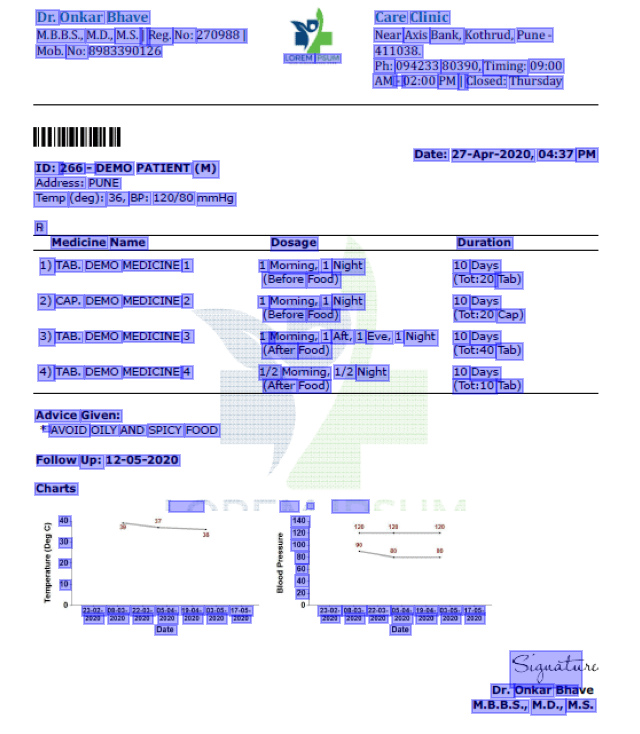

In [5]:
# Perform OCR using the loaded predictor
result = predictor_2(doc)
result.show(doc)


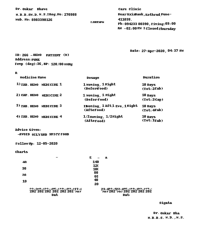

In [9]:
synthetic_pages = result.synthesize()
plt.imshow(synthetic_pages[0])
plt.axis('off')
plt.show()

In [10]:
# JSON export
json_export = result.export()
print(json_export)

{'pages': [{'page_idx': 0, 'dimensions': (629, 547), 'orientation': {'value': None, 'confidence': None}, 'language': {'value': None, 'confidence': None}, 'blocks': [{'geometry': ((0.044921875, 0.00390625), (0.3828125, 0.0712890625)), 'lines': [{'geometry': ((0.044921875, 0.00390625), (0.2275390625, 0.0244140625)), 'words': [{'value': 'Dr.', 'confidence': 0.8888074159622192, 'geometry': ((0.044921875, 0.00390625), (0.08203125, 0.0244140625))}, {'value': 'Onkar', 'confidence': 0.9980214834213257, 'geometry': ((0.0830078125, 0.0048828125), (0.1552734375, 0.0234375))}, {'value': 'Bhave', 'confidence': 0.997329831123352, 'geometry': ((0.158203125, 0.0048828125), (0.2275390625, 0.0234375))}]}, {'geometry': ((0.046875, 0.0283203125), (0.3828125, 0.0517578125)), 'words': [{'value': 'M.B.B.S.,', 'confidence': 0.8802862763404846, 'geometry': ((0.046875, 0.0302734375), (0.123046875, 0.048828125))}, {'value': 'M.D.,', 'confidence': 0.9911013841629028, 'geometry': ((0.125, 0.0302734375), (0.171875,